In [ ]:
import warnings
warnings.filterwarnings("ignore")
import  numpy as np
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/pima_diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
def cal_median(df,target,var):
    temp = df[df[var].notnull()]
    temp = temp[[var,target]].groupby([target])[[var]].median().reset_index()
    return temp

In [ ]:
def median_imputation(df,target,var,var_0,var_1):
    for i in range(len(df)):
        if df.loc[i,target] == 0 and df.loc[i,var] == 0:
            df.loc[i,var]=var_0

        if df.loc[i,target] == 1 and df.loc[i,var] == 0:
            df.loc[i,var] = var_1



In [ ]:
d = cal_median(df,"Outcome","Insulin")
d

,Outcome,Insulin
0,0,39.0
1,1,0.0


In [ ]:
median_imputation(df,"Outcome","Insulin",d.loc[0,"Insulin"],d.loc[1,"Insulin"])

In [ ]:
d=cal_median(df,"Outcome","Glucose")
d

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [ ]:
median_imputation(df,"Outcome","Glucose",d.loc[0,"Glucose"],d.loc[1,"Glucose"])

In [ ]:
d=cal_median(df,"Outcome","SkinThickness")
d

,Outcome,SkinThickness
0,0,21.0
1,1,27.0


In [ ]:
median_imputation(df,"Outcome","SkinThickness",d.loc[0,"SkinThickness"],d.loc[1,"SkinThickness"])

In [ ]:
d=cal_median(df,"Outcome","BloodPressure")
d

,Outcome,BloodPressure
0,0,70.0
1,1,74.0


In [ ]:
median_imputation(df,"Outcome","BloodPressure",d.loc[0,"BloodPressure"],d.loc[1,"BloodPressure"])

In [ ]:
d=cal_median(df,"Outcome","BMI")
d

,Outcome,BMI
0,0,30.05
1,1,34.25


In [ ]:
median_imputation(df,"Outcome","BMI",d.loc[0,"BMI"],d.loc[1,"BMI"])

In [ ]:
import plotly.express as exp
import plotly.io as pio

def plot_data(df,varx,vary,target):
    pio.templates.default="simple_white"
    exp.defaults.template = "ggplot2"
    exp.defaults.color_continuous_scale = exp.colors.sequential.Blackbody
    exp.defaults.width = 800
    exp.defaults.height = 600
    fig = exp.scatter(df,x=varx,y=vary,color=target)
    fig.show()

In [ ]:
plot_data(df,"Glucose","Age","Outcome")

In [ ]:
df.loc[:,"N1"] = 1
df.loc[(df['Age']<=30) & (df['Glucose']<=120),"N1"]=0
df.loc[(df['Age']>30) & (df['Age']<48) & (df['Glucose']<=88),"N1"]=0 # extra
df.loc[(df['Age']>=63) & (df['Glucose']<=142),"N1"]=0 # extra

In [ ]:
df.loc[:,'N2']=1
df.loc[(df['BMI']<=30),'N2']=0

In [ ]:
plot_data(df,"Pregnancies","Age","Outcome")

In [ ]:
df.loc[:,'N3']=1
df.loc[(df['Age']<=27) & (df['Pregnancies']<=6),'N3']=0
df.loc[(df['Age']>60) & (df['Pregnancies']>7.5),'N3']=0 # extra

In [ ]:
plot_data(df,"Glucose","BloodPressure","Outcome")

In [ ]:
df.loc[:,'N4']=1
df.loc[(df['Glucose']<=105) & (df['BloodPressure']<=80),'N4']=0
df.loc[(df['Glucose']<=105) & (df['BloodPressure']>83),'N4']=0 #extra

In [ ]:
df.loc[:,'N5']=1
df.loc[(df['SkinThickness']<=20) ,'N5']=0

In [ ]:
plot_data(df,"SkinThickness","BMI","Outcome")

In [ ]:
df.loc[:,'N6']=1
df.loc[(df['BMI']<30) & (df['SkinThickness']<=20),'N6']=0
df.loc[(df['BMI']>33) & (df['SkinThickness']<=20),'N6']=0 # extra

In [ ]:
plot_data(df,"Glucose","BMI","Outcome")

In [ ]:
df.loc[:,'N7']=1
df.loc[(df['Glucose']<=105) & (df['BMI']<=30),'N7']=0
df.loc[(df['Glucose']<=105) & (df['BMI'] >=40),'N7']=0 # extra rule included

In [ ]:
df.loc[:,'N9']=1
df.loc[(df['Insulin']<200),'N9']=0

In [ ]:
df.loc[:,'N10']=1
df.loc[(df['BloodPressure']<80),'N10']=0

In [ ]:
df.loc[:,'N11']=1
df.loc[(df['Pregnancies']<4) & (df['Pregnancies']!=0) ,'N11']=0

In [ ]:
df['N0'] = df['BMI'] * df['SkinThickness']

df['N8'] =  df['Pregnancies'] / df['Age']

df['N13'] = df['Glucose'] / df['DiabetesPedigreeFunction']

df['N12'] = df['Age'] * df['DiabetesPedigreeFunction']

#df['N14'] = df['Age'] / df['Insulin'] as it is giving inf value

In [ ]:
df.loc[:,'N15']=1
df.loc[(df['N0']<1034) ,'N15']=0

In [ ]:
#df.drop("N14",axis=1,inplace=True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,N1,...,N6,N7,N9,N10,N11,N0,N8,N13,N12,N15
0,6,148,72,35,0,33.6,0.627,50,1,1,...,1,1,0,0,1,1176.0,0.120000,236.044657,31.350,1
1,1,85,66,29,39,26.6,0.351,31,0,0,...,1,0,0,0,0,771.4,0.032258,242.165242,10.881,0
2,8,183,64,27,0,23.3,0.672,32,1,1,...,1,1,0,0,1,629.1,0.250000,272.321429,21.504,0
3,1,89,66,23,94,28.1,0.167,21,0,0,...,1,0,0,0,0,646.3,0.047619,532.934132,3.507,0
4,0,137,40,35,168,43.1,2.288,33,1,1,...,1,1,0,0,1,1508.5,0.000000,59.877622,75.504,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0,...,1,1,0,0,1,1579.2,0.158730,590.643275,10.773,1
764,2,122,70,27,39,36.8,0.340,27,0,1,...,1,1,0,0,0,993.6,0.074074,358.823529,9.180,0
765,5,121,72,23,112,26.2,0.245,30,0,1,...,1,1,0,0,1,602.6,0.166667,493.877551,7.350,0
766,1,126,60,27,0,30.1,0.349,47,1,1,...,1,1,0,0,0,812.7,0.021277,361.031519,16.403,0


In [ ]:
y=pd.DataFrame(df["Outcome"])
x= df.drop("Outcome",axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in y.columns:
    y[col]= encoder.fit_transform(y[col])

In [ ]:
y = y["Outcome"]

In [ ]:
cols=["N1","N2","N3","N4","N5","N6","N7","N9","N10","N11"]
for col in cols:
    x[col]=encoder.fit_transform(x[col])


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42) #stratify=y)

Bagging - Decision Tree

In [ ]:
bagging = BaggingClassifier(DecisionTreeClassifier(random_state=42),n_estimators=500,
                           max_samples=100,bootstrap=True,n_jobs=-1,random_state=42,
                           oob_score=True)
bagging.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True,
                  random_state=42)

In [ ]:
BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True,
                  random_state=42)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True,
                  random_state=42)

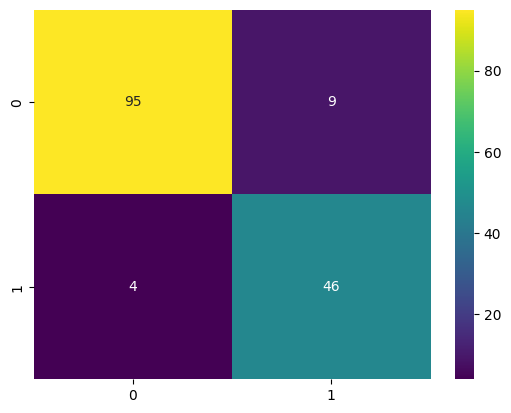

In [ ]:
confusion_matrix = confusion_matrix(bagging.predict(x_test),y_test)
sb.heatmap(confusion_matrix,annot=True,fmt="0.2g",cmap="viridis")
plt.show()

In [ ]:
print(classification_report(bagging.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94       104
           1       0.84      0.92      0.88        50

    accuracy                           0.92       154
   macro avg       0.90      0.92      0.91       154
weighted avg       0.92      0.92      0.92       154



Voting Classifier - Logistic Regression, Random Forest, and Support Vector Machine

In [ ]:
#If we use max_iter > 1100 then accuracy degrades
lr = LogisticRegression(max_iter=10000)
rf = RandomForestClassifier()
sv = SVC()

voting = VotingClassifier(estimators = [('lr', lr), ('rf', rf), ('svc',sv)],voting= "hard")
voting.fit(x_train,y_train)
#voting.predict(x_test)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=10000)),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [ ]:
VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=10000)),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=10000)),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [ ]:
print(classification_report(voting.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86       110
           1       0.64      0.80      0.71        44

    accuracy                           0.81       154
   macro avg       0.77      0.81      0.78       154
weighted avg       0.83      0.81      0.82       154



Gaussian Naive Bayes

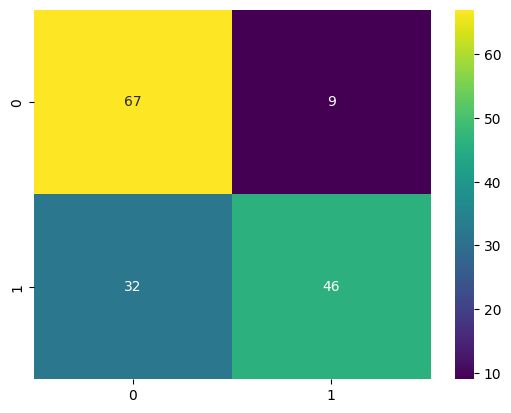

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Fit the Gaussian Naive Bayes classifier on the training data
gcf = GaussianNB()
gcf.fit(x_train, y_train)

# Generate predictions using the Gaussian Naive Bayes classifier on the test set
predictions = gcf.predict(x_test)

# Compute the confusion matrix for the Gaussian Naive Bayes classifier predictions
confusion_matrix_naive = confusion_matrix(predictions, y_test)

# Visualize the confusion matrix using a heatmap
sns.heatmap(confusion_matrix_naive, annot=True, fmt="0.2g", cmap="viridis")
plt.show()


In [ ]:
confusion_matrix_naive = [[67,  9],[32, 46]]  # Your confusion matrix
print(confusion_matrix_naive)


[[67, 9], [32, 46]]


In [ ]:
print(classification_report(y_test,gcf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.88      0.68      0.77        99
           1       0.59      0.84      0.69        55

    accuracy                           0.73       154
   macro avg       0.74      0.76      0.73       154
weighted avg       0.78      0.73      0.74       154



Support Vector Machine with GridSearchCV

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
std = StandardScaler()
x1 = std.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.659 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.656 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.659 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.659 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.664 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.691 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
print(classification_report(y_test,grid.predict(x_test)))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80        99
           1       0.64      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



RandomForest Classifier with GridSearchCV

In [ ]:
rf = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=100, oob_score = True)
param_grid = {
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
rfc.fit(x_train,y_train)
print(classification_report(y_test,rfc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90        99
           1       0.83      0.82      0.83        55

    accuracy                           0.88       154
   macro avg       0.87      0.86      0.87       154
weighted avg       0.88      0.88      0.88       154



XGBoost Classifier

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)
xgbc = xgb.XGBClassifier(
 learning_rate = 0.01,
 n_estimators= 2000,
 max_depth= 9,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.4,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(x_train, y_train)

In [ ]:
print(classification_report(y_test,xgbc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        99
           1       0.85      0.82      0.83        55

    accuracy                           0.88       154
   macro avg       0.88      0.87      0.87       154
weighted avg       0.88      0.88      0.88       154



NGBoost Classifier

In [ ]:
pip install --upgrade ngboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 7.4 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=bc188d3d81a49fc255cfbc5f98f3bfd8b4b4aa156d4ccb4c0331761c224d7b7d
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [ ]:
from ngboost import NGBClassifier
from ngboost.distns import Bernoulli

In [ ]:
ngb = NGBClassifier(Dist=Bernoulli).fit(x_train, y_train)
print(classification_report(y_test,ngb.predict(x_test)))

[iter 0] loss=0.6455 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 100] loss=0.2137 val_loss=0.0000 scale=2.0000 norm=2.7007
[iter 200] loss=0.1898 val_loss=0.0000 scale=1.0000 norm=1.3271
[iter 300] loss=0.1816 val_loss=0.0000 scale=0.5000 norm=0.6605
[iter 400] loss=0.1771 val_loss=0.0000 scale=0.2500 norm=0.3294
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        99
           1       0.87      0.82      0.84        55

    accuracy                           0.89       154
   macro avg       0.88      0.87      0.88       154
weighted avg       0.89      0.89      0.89       154



LightGBM Classifier

In [ ]:
import lightgbm as lgbm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the parameters for LightGBM
params = {
    'learning_rate': 0.01,
    'n_estimators': 2000,
    'max_depth': 9,
    'min_child_samples': 2,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'binary',
    'random_state': 42,
    'metric': 'binary_logloss'
}

# Initialize and train the LightGBM classifier
lgbm_clf = lgbm.LGBMClassifier(**params)
lgbm_clf.fit(x_train, y_train)

# Evaluate the classifier
print(classification_report(y_test, lgbm_clf.predict(x_test)))


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000340 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1399
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

In [ ]:
model = lgbm_clf
model.fit(x_train,y_train)
print(classification_report(y_test,model.predict(x_test)))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1399
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
#lrc = LogisticRegression(max_iter=1100)
abc = AdaBoostClassifier(n_estimators=50,base_estimator=rf,learning_rate=1).fit(x_train,y_train)

print(classification_report(y_test,abc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88        99
           1       0.80      0.78      0.79        55

    accuracy                           0.85       154
   macro avg       0.84      0.84      0.84       154
weighted avg       0.85      0.85      0.85       154



Weighted Average

In [ ]:
final_predict = 0.5*lgbm_clf.predict(x_test) + 0.4*ngb.predict(x_test) +  0.1*xgbc.predict(x_test)
#print(final_predict)
for i in range(len(final_predict)):
    if final_predict[i] >= 0.5 :
        final_predict[i] = 1
    else:
        final_predict[i] = 0
#final_predict
print(classification_report(y_test,final_predict))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        99
           1       0.84      0.84      0.84        55

    accuracy                           0.88       154
   macro avg       0.87      0.87      0.87       154
weighted avg       0.88      0.88      0.88       154



Stacking

In [ ]:
pip install vecstack

  Preparing metadata (setup.py) ... done
  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19863 sha256=79d9f3c1c645a44cdecba99a692ce59981a5819bd45b0e88206c2f46b05c1db2
  Stored in directory: /root/.cache/pip/wheels/b8/d8/51/3cf39adf22c522b0a91dc2208db4e9de4d2d9d171683596220
Successfully built vecstack


In [ ]:
from vecstack import stacking
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
models = [AdaBoostClassifier(n_estimators=50,learning_rate=1),
         NGBClassifier(Dist=Bernoulli),
         xgb.XGBClassifier(learning_rate = 0.01,n_estimators= 2000,
                           max_depth= 9,
                            min_child_weight= 2,
                            #gamma=1,
                             gamma=0.4,
                             subsample=0.8,
                             colsample_bytree=0.8,
                             objective= 'binary:logistic',
                              nthread= -1,
                              scale_pos_weight=1)]
         #KNeighborsClassifier(n_neighbors=5,n_jobs=-1)]
level1_train,level1_test = stacking(models,x_train,y_train,x_test,
                                   regression=False,
                                   mode='oof_pred_bag',
                                   needs_proba=False,
                                   save_dir=None,
                                   metric=accuracy_score,
                                   n_folds=4,
                                   stratified=True,
                                   shuffle=True,
                                   random_state=0,
                                   verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [AdaBoostClassifier]
    fold  0:  [0.86363636]
    fold  1:  [0.87012987]
    fold  2:  [0.86274510]
    fold  3:  [0.89542484]
    ----
    MEAN:     [0.87298404] + [0.01326603]
    FULL:     [0.87296417]

model  1:     [NGBClassifier]
[iter 0] loss=0.6461 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 100] loss=0.2081 val_loss=0.0000 scale=2.0000 norm=2.6597
[iter 200] loss=0.1887 val_loss=0.0000 scale=4.0000 norm=5.2510
[iter 300] loss=0.1824 val_loss=0.0000 scale=0.5000 norm=0.6535
[iter 400] loss=0.1796 val_loss=0.0000 scale=0.5000 norm=0.6520
    fold  0:  [0.88961039]
[iter 0] loss=0.6447 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 100] loss=0.1970 val_loss=0.0000 scale=2.0000 norm=2.6224
[iter 200] loss=0.1739 val_loss=0.0000 scale=2.0000 norm=2.5789
[iter 300] loss=0.1659 val_loss=0.0000 scale=1.0000 norm=1.2817
[iter 400] loss=0.161

In [ ]:
model = xgb.XGBClassifier(learning_rate = 0.1,n_estimators= 2000,max_depth= 3)
model.fit(level1_train,y_train)
predicted = model.predict(level1_test)
print(classification_report(predicted,y_test))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       103
           1       0.82      0.88      0.85        51

    accuracy                           0.90       154
   macro avg       0.88      0.89      0.88       154
weighted avg       0.90      0.90      0.90       154



In [ ]:
from vecstack import stacking
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from ngboost import NGBClassifier
from ngboost.distns import Bernoulli  # Import Bernoulli distribution class
from sklearn.metrics import classification_report

# Define the models for stacking
models = [
    AdaBoostClassifier(n_estimators=50, learning_rate=1),
    NGBClassifier(Dist=Bernoulli),  # Use Bernoulli distribution class
    xgb.XGBClassifier(
        learning_rate=0.01,
        n_estimators=2000,
        max_depth=9,
        min_child_weight=2,
        gamma=0.4,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='binary:logistic',
        nthread=-1,
        scale_pos_weight=1
    )
]

# Collect custom user input for features
pregnancies = int(input("Enter number of pregnancies: "))
glucose = float(input("Enter glucose level: "))
blood_pressure = float(input("Enter blood pressure: "))
skin_thickness = float(input("Enter skin thickness: "))
insulin = float(input("Enter insulin level: "))
bmi = float(input("Enter BMI: "))
diabetes_pedigree_function = float(input("Enter Diabetes Pedigree Function: "))
age = float(input("Enter age: "))

# Create the input vector for prediction
user_input = [[pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree_function, age]]

# Use stacking to prepare the input for the final model
level1_train, level1_test = stacking(
    models,
    x_train,
    y_train,
    x_test,
    regression=False,
    mode='oof_pred_bag',
    needs_proba=False,
    save_dir=None,
    metric=None,
    n_folds=4,
    stratified=True,
    shuffle=True,
    random_state=0,
    verbose=0
)

# Train the final model
model = xgb.XGBClassifier(learning_rate=0.1, n_estimators=2000, max_depth=3)
model.fit(level1_train, y_train)

# Make predictions
predicted = model.predict(level1_test)

# Print the classification report
print("Prediction:", "Positive" if predicted[0] == 1 else "Negative")

# Check for diabetes type if the prediction is positive
if predicted[0] == 1:
    if age < 20:
        print("Diabetes Type 1")
    else:
        print("Diabetes Type 2")


Enter number of pregnancies: 1
Enter glucose level: 120
Enter blood pressure: 50
Enter skin thickness: 1
Enter insulin level: 120
Enter BMI: 25
Enter Diabetes Pedigree Function: 1.2
Enter age: 25
[iter 0] loss=0.6461 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 100] loss=0.2081 val_loss=0.0000 scale=2.0000 norm=2.6597
[iter 200] loss=0.1887 val_loss=0.0000 scale=4.0000 norm=5.2510
[iter 300] loss=0.1824 val_loss=0.0000 scale=0.5000 norm=0.6535
[iter 400] loss=0.1796 val_loss=0.0000 scale=0.5000 norm=0.6520
[iter 0] loss=0.6447 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 100] loss=0.1970 val_loss=0.0000 scale=2.0000 norm=2.6224
[iter 200] loss=0.1739 val_loss=0.0000 scale=2.0000 norm=2.5789
[iter 300] loss=0.1659 val_loss=0.0000 scale=1.0000 norm=1.2817
[iter 400] loss=0.1619 val_loss=0.0000 scale=0.5000 norm=0.6395
[iter 0] loss=0.6456 val_loss=0.0000 scale=8.0000 norm=16.0000
[iter 100] loss=0.1982 val_loss=0.0000 scale=2.0000 norm=2.6188
[iter 200] loss=0.1730 val_loss=0.0000 sc

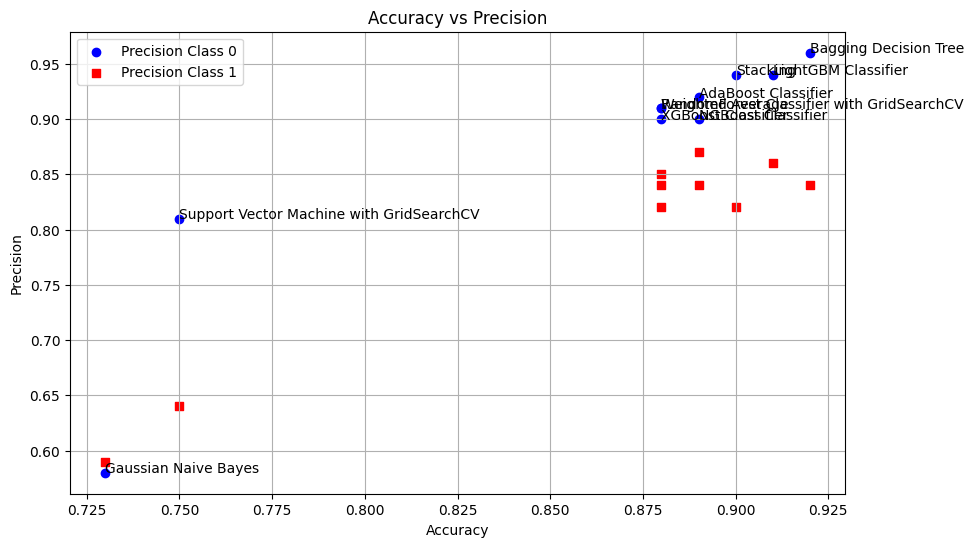

In [ ]:
import matplotlib.pyplot as plt

# Algorithm names
algorithms = ["Bagging Decision Tree", "Gaussian Naive Bayes", "Support Vector Machine with GridSearchCV",
              "RandomForest Classifier with GridSearchCV", "XGBoost Classifier", "NGBoost Classifier",
              "LightGBM Classifier", "AdaBoost Classifier", "Weighted Average", "Stacking"]

# Precision and accuracy values
precision_class_0 = [0.96, 0.58, 0.81, 0.91, 0.90, 0.90, 0.94, 0.92, 0.91, 0.94]
precision_class_1 = [0.84, 0.59, 0.64, 0.82, 0.85, 0.87, 0.86, 0.84, 0.84, 0.82]
accuracy = [0.92, 0.73, 0.75, 0.88, 0.88, 0.89, 0.91, 0.89, 0.88, 0.90]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(accuracy, precision_class_0, color='blue', label='Precision Class 0', marker='o')
plt.scatter(accuracy, precision_class_1, color='red', label='Precision Class 1', marker='s')

# Add labels and title
plt.title('Accuracy vs Precision')
plt.xlabel('Accuracy')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

# Add algorithm names as annotations
for i, txt in enumerate(algorithms):
    plt.annotate(txt, (accuracy[i], precision_class_0[i]))

# Show plot
plt.show()


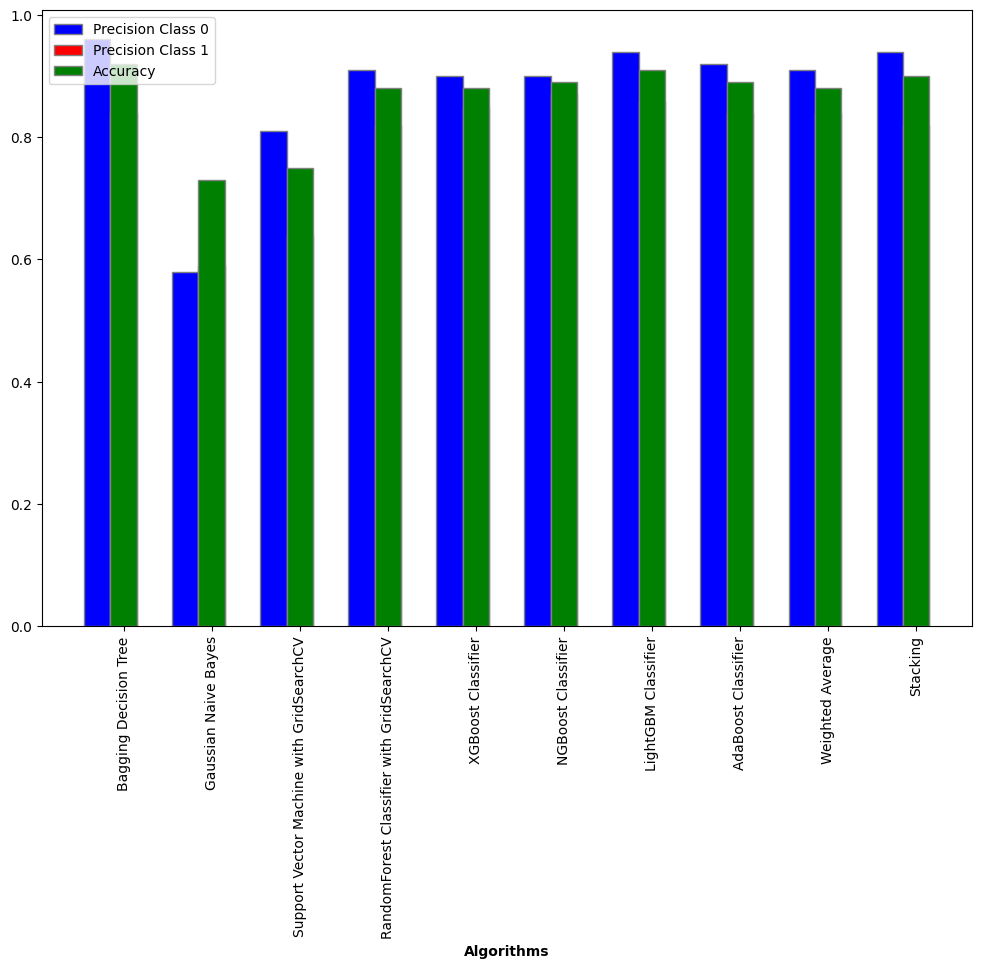

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Algorithm names
algorithms = ["Bagging Decision Tree", "Gaussian Naive Bayes", "Support Vector Machine with GridSearchCV",
              "RandomForest Classifier with GridSearchCV", "XGBoost Classifier", "NGBoost Classifier",
              "LightGBM Classifier", "AdaBoost Classifier", "Weighted Average", "Stacking"]

# Precision and accuracy values
precision_class_0 = [0.96, 0.58, 0.81, 0.91, 0.90, 0.90, 0.94, 0.92, 0.91, 0.94]
precision_class_1 = [0.84, 0.59, 0.64, 0.82, 0.85, 0.87, 0.86, 0.84, 0.84, 0.82]
accuracy = [0.92, 0.73, 0.75, 0.88, 0.88, 0.89, 0.91, 0.89, 0.88, 0.90]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Set width of bars
bar_width = 0.3

# Set position of bar on X axis
r1 = np.arange(len(algorithms))
r2 = [x + bar_width for x in r1]

# Make the plot
plt.bar(r1, precision_class_0, color='b', width=bar_width, edgecolor='grey', label='Precision Class 0')
plt.bar(r2, precision_class_1, color='r', width=bar_width, edgecolor='grey', label='Precision Class 1')
plt.bar(r2, accuracy, color='g', width=bar_width, edgecolor='grey', label='Accuracy')

# Add xticks on the middle of the group bars
plt.xlabel('Algorithms', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(algorithms))], algorithms, rotation=90)

# Create legend & Show graphic
plt.legend()
plt.show()


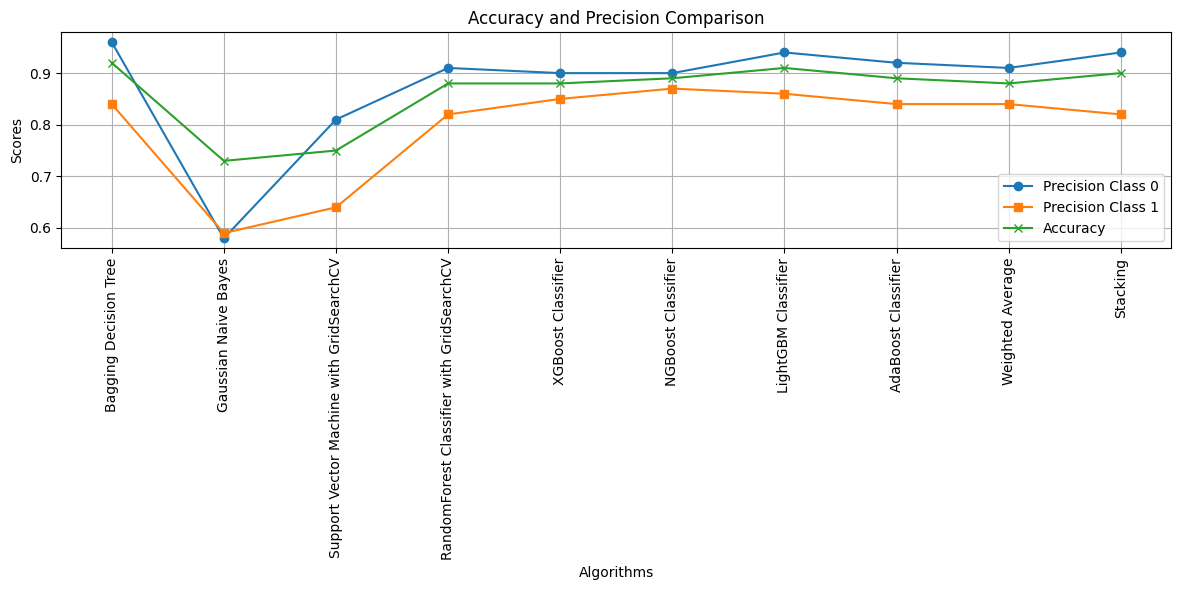

In [ ]:
import matplotlib.pyplot as plt

# Algorithm names
algorithms = ["Bagging Decision Tree", "Gaussian Naive Bayes", "Support Vector Machine with GridSearchCV",
              "RandomForest Classifier with GridSearchCV", "XGBoost Classifier", "NGBoost Classifier",
              "LightGBM Classifier", "AdaBoost Classifier", "Weighted Average", "Stacking"]

# Precision and accuracy values
precision_class_0 = [0.96, 0.58, 0.81, 0.91, 0.90, 0.90, 0.94, 0.92, 0.91, 0.94]
precision_class_1 = [0.84, 0.59, 0.64, 0.82, 0.85, 0.87, 0.86, 0.84, 0.84, 0.82]
accuracy = [0.92, 0.73, 0.75, 0.88, 0.88, 0.89, 0.91, 0.89, 0.88, 0.90]

# Plotting the lines
plt.figure(figsize=(12, 6))
plt.plot(algorithms, precision_class_0, marker='o', label='Precision Class 0', linestyle='-')
plt.plot(algorithms, precision_class_1, marker='s', label='Precision Class 1', linestyle='-')
plt.plot(algorithms, accuracy, marker='x', label='Accuracy', linestyle='-')

# Adding labels and title
plt.xlabel('Algorithms')
plt.ylabel('Scores')
plt.title('Accuracy and Precision Comparison')
plt.xticks(rotation=90)
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()


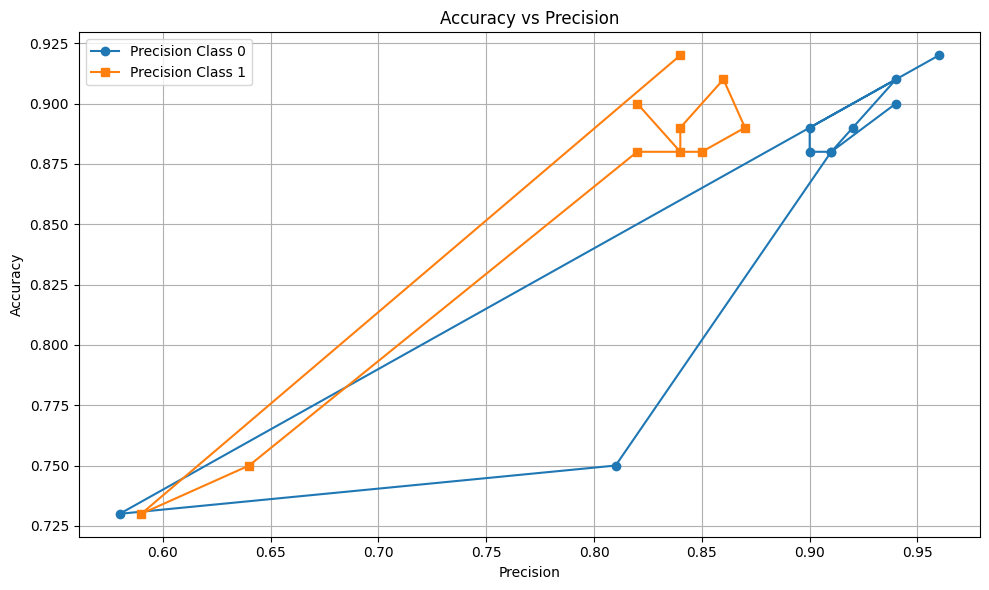

In [ ]:
import matplotlib.pyplot as plt

# Algorithm names
algorithms = ["Bagging Decision Tree", "Gaussian Naive Bayes", "Support Vector Machine with GridSearchCV",
              "RandomForest Classifier with GridSearchCV", "XGBoost Classifier", "NGBoost Classifier",
              "LightGBM Classifier", "AdaBoost Classifier", "Weighted Average", "Stacking"]

# Precision and accuracy values
precision_class_0 = [0.96, 0.58, 0.81, 0.91, 0.90, 0.90, 0.94, 0.92, 0.91, 0.94]
precision_class_1 = [0.84, 0.59, 0.64, 0.82, 0.85, 0.87, 0.86, 0.84, 0.84, 0.82]
accuracy = [0.92, 0.73, 0.75, 0.88, 0.88, 0.89, 0.91, 0.89, 0.88, 0.90]

# Plotting the lines
plt.figure(figsize=(10, 6))

plt.plot(precision_class_0, accuracy, marker='o', label='Precision Class 0')
plt.plot(precision_class_1, accuracy, marker='s', label='Precision Class 1')

# Adding labels and title
plt.xlabel('Precision')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Precision')
plt.legend()
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


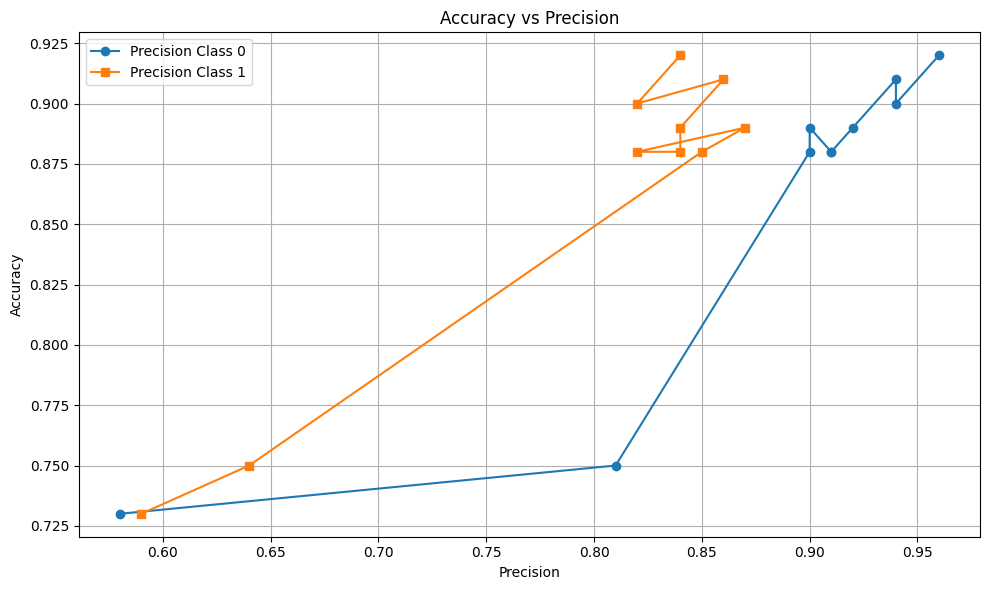

In [ ]:
import matplotlib.pyplot as plt

# Algorithm names
algorithms = ["Bagging Decision Tree", "Gaussian Naive Bayes", "Support Vector Machine with GridSearchCV",
              "RandomForest Classifier with GridSearchCV", "XGBoost Classifier", "NGBoost Classifier",
              "LightGBM Classifier", "AdaBoost Classifier", "Weighted Average", "Stacking"]

# Precision and accuracy values
precision_class_0 = [0.96, 0.58, 0.81, 0.91, 0.90, 0.90, 0.94, 0.92, 0.91, 0.94]
precision_class_1 = [0.84, 0.59, 0.64, 0.82, 0.85, 0.87, 0.86, 0.84, 0.84, 0.82]
accuracy = [0.92, 0.73, 0.75, 0.88, 0.88, 0.89, 0.91, 0.89, 0.88, 0.90]

# Sort data
sorted_indices = sorted(range(len(precision_class_0)), key=lambda k: precision_class_0[k])
algorithms_sorted = [algorithms[i] for i in sorted_indices]
precision_class_0_sorted = [precision_class_0[i] for i in sorted_indices]
precision_class_1_sorted = [precision_class_1[i] for i in sorted_indices]
accuracy_sorted = [accuracy[i] for i in sorted_indices]

# Plotting the lines
plt.figure(figsize=(10, 6))

plt.plot(precision_class_0_sorted, accuracy_sorted, marker='o', label='Precision Class 0')
plt.plot(precision_class_1_sorted, accuracy_sorted, marker='s', label='Precision Class 1')

# Adding labels and title
plt.xlabel('Precision')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Precision')
plt.legend()
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Data
data = {
    'Algorithm': ["Bagging Decision Tree", "Gaussian Naive Bayes", "Support Vector Machine with GridSearchCV",
                  "RandomForest Classifier with GridSearchCV", "XGBoost Classifier", "NGBoost Classifier",
                  "LightGBM Classifier", "AdaBoost Classifier", "Weighted Average", "Stacking"],
    'Precision_Class_0': [0.96, 0.58, 0.81, 0.91, 0.90, 0.90, 0.94, 0.92, 0.91, 0.94],
    'Precision_Class_1': [0.84, 0.59, 0.64, 0.82, 0.85, 0.87, 0.86, 0.84, 0.84, 0.82],
    'Accuracy': [0.92, 0.73, 0.75, 0.88, 0.88, 0.89, 0.91, 0.89, 0.88, 0.90]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Calculate combined score (average of precision and accuracy)
df['Combined_Score'] = (df['Precision_Class_0'] + df['Precision_Class_1'] + df['Accuracy']) / 3

# Select top three algorithms with the highest combined scores
top_three = df.nlargest(3, 'Combined_Score')

# Display top three algorithms
print(top_three[['Algorithm', 'Combined_Score']])


               Algorithm  Combined_Score
0  Bagging Decision Tree        0.906667
6    LightGBM Classifier        0.903333
5     NGBoost Classifier        0.886667


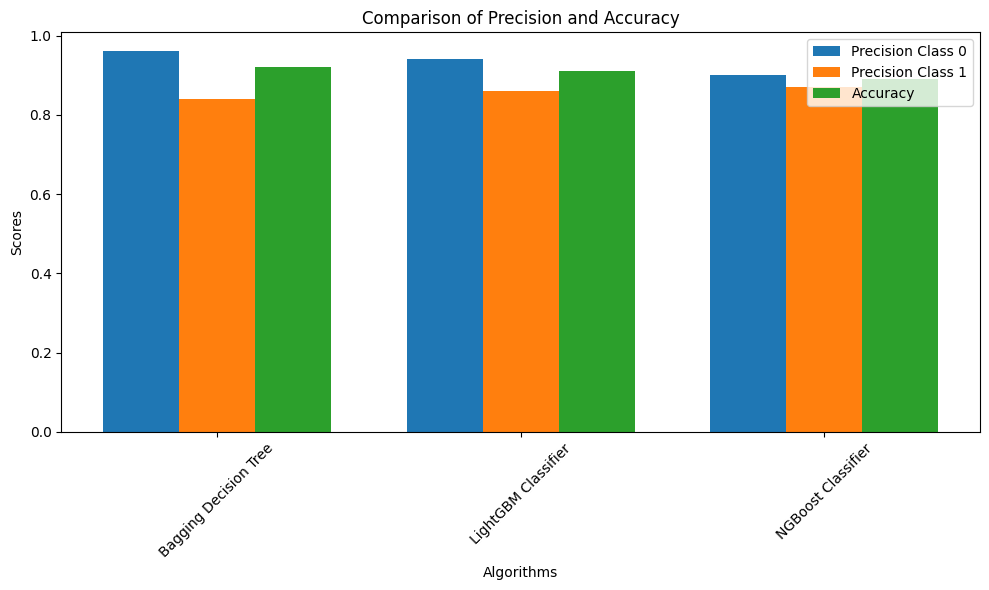

In [ ]:
import matplotlib.pyplot as plt

# Algorithm names
algorithms = ["Bagging Decision Tree", "LightGBM Classifier", "NGBoost Classifier"]

# Precision and accuracy values
precision_class_0 = [0.96, 0.94, 0.90]
precision_class_1 = [0.84, 0.86, 0.87]
accuracy = [0.92, 0.91, 0.89]

# Plotting the bars
plt.figure(figsize=(10, 6))

bar_width = 0.25
index = range(len(algorithms))

plt.bar(index, precision_class_0, bar_width, label='Precision Class 0')
plt.bar([i + bar_width for i in index], precision_class_1, bar_width, label='Precision Class 1')
plt.bar([i + 2*bar_width for i in index], accuracy, bar_width, label='Accuracy')

# Adding labels and title
plt.xlabel('Algorithms')
plt.ylabel('Scores')
plt.title('Comparison of Precision and Accuracy')
plt.xticks([i + bar_width for i in index], algorithms, rotation=45)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


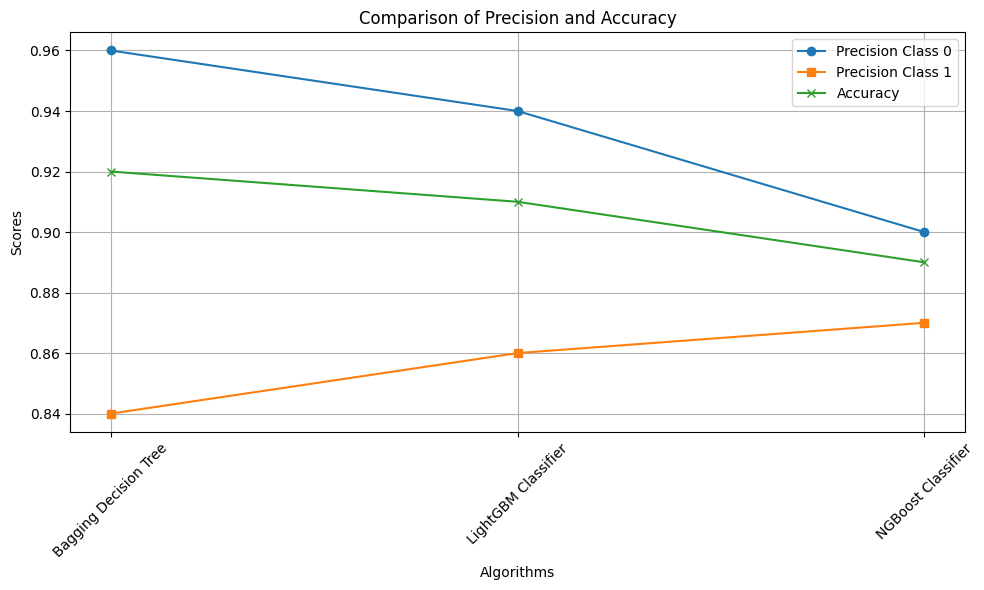

In [ ]:
import matplotlib.pyplot as plt

# Algorithm names
algorithms = ["Bagging Decision Tree", "LightGBM Classifier", "NGBoost Classifier"]

# Precision and accuracy values
precision_class_0 = [0.96, 0.94, 0.90]
precision_class_1 = [0.84, 0.86, 0.87]
accuracy = [0.92, 0.91, 0.89]

# Plotting the lines
plt.figure(figsize=(10, 6))

plt.plot(algorithms, precision_class_0, marker='o', label='Precision Class 0')
plt.plot(algorithms, precision_class_1, marker='s', label='Precision Class 1')
plt.plot(algorithms, accuracy, marker='x', label='Accuracy')

# Adding labels and title
plt.xlabel('Algorithms')
plt.ylabel('Scores')
plt.title('Comparison of Precision and Accuracy')
plt.xticks(rotation=45)
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()


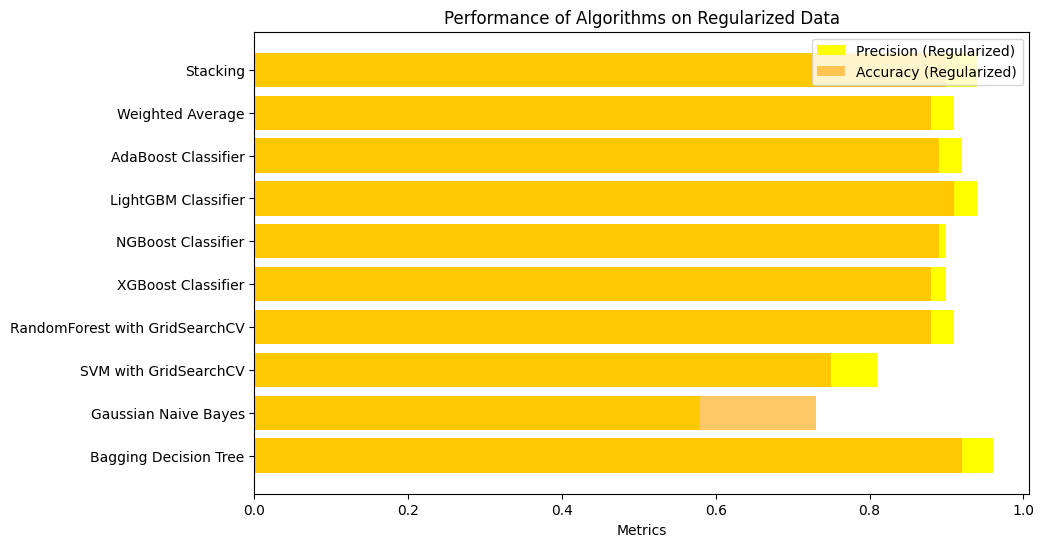

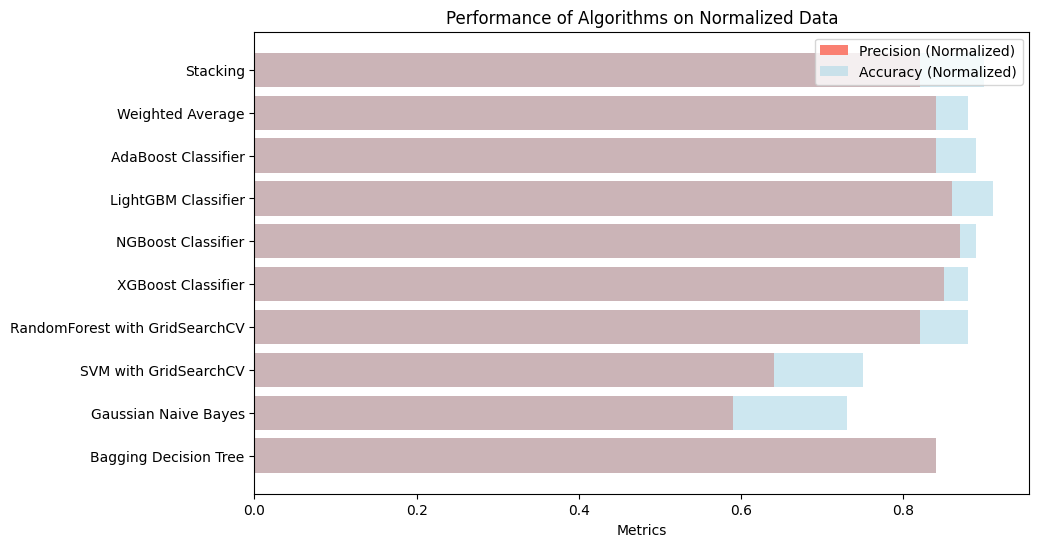

In [ ]:
import matplotlib.pyplot as plt

# Data
algorithms = [
    "Bagging Decision Tree",
    "Gaussian Naive Bayes",
    "SVM with GridSearchCV",
    "RandomForest with GridSearchCV",
    "XGBoost Classifier",
    "NGBoost Classifier",
    "LightGBM Classifier",
    "AdaBoost Classifier",
    "Weighted Average",
    "Stacking"
]

# Metrics on regularized data
precision_reg = [0.96, 0.58, 0.81, 0.91, 0.90, 0.90, 0.94, 0.92, 0.91, 0.94]
accuracy_reg = [0.92, 0.73, 0.75, 0.88, 0.88, 0.89, 0.91, 0.89, 0.88, 0.90]

# Metrics on normalized data
precision_norm = [0.84, 0.59, 0.64, 0.82, 0.85, 0.87, 0.86, 0.84, 0.84, 0.82]
accuracy_norm = [0.84, 0.73, 0.75, 0.88, 0.88, 0.89, 0.91, 0.89, 0.88, 0.90]

# Plotting regularized data
plt.figure(figsize=(10, 6))
plt.barh(algorithms, precision_reg, color='Yellow', label='Precision (Regularized)')
plt.barh(algorithms, accuracy_reg, color='Orange', alpha=0.6, label='Accuracy (Regularized)')
plt.xlabel('Metrics')
plt.title('Performance of Algorithms on Regularized Data')
plt.legend()
plt.show()

# Plotting normalized data
plt.figure(figsize=(10, 6))
plt.barh(algorithms, precision_norm, color='salmon', label='Precision (Normalized)')
plt.barh(algorithms, accuracy_norm, color='lightblue', alpha=0.6, label='Accuracy (Normalized)')
plt.xlabel('Metrics')
plt.title('Performance of Algorithms on Normalized Data')
plt.legend()
plt.show()


In [ ]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.9 MB/s eta 0:00:00


In [ ]:
# Step 1: Install Streamlit in Google Colab
!pip install streamlit

# Step 2: Write the Streamlit app code
streamlit_app_code = """
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import base64
from datetime import datetime

# Load the diabetes dataset
diabetes_df = pd.read_csv('/content/pima_diabetes.csv')

# Initialize history DataFrame to store user data
history_df = pd.DataFrame(columns=['Name', 'Age', 'Gender', 'Pregnancies', 'Glucose', 'Blood Pressure',
                                    'Skin Thickness', 'Insulin', 'BMI', 'Diabetes Pedigree Function',
                                    'Diagnosis', 'Diabetes Type'])

# Function to predict diagnosis and type
def predict_diagnosis_and_type(age, glucose):
    if age < 18:
        diabetes_type = "Type 1"
    else:
        diabetes_type = "Type 2"
    # Assuming some prediction logic here
    diagnosis = "Positive" if glucose > 120 else "Negative"
    return diagnosis, diabetes_type if diagnosis == "Positive" else "NA"

# Sidebar for user input
st.sidebar.header('Patient Information')
name = st.sidebar.text_input('Name')
age = st.sidebar.slider('Age', 0, 100, 30)
gender = st.sidebar.radio('Gender', ['Male', 'Female'])

# Remove Pregnancies option for male gender
if gender == 'Female':
    pregnancies = st.sidebar.slider('Pregnancies', 0, 17, 3)
else:
    pregnancies = None

# Sidebar for user medical input
st.sidebar.header('Medical Information')
glucose = st.sidebar.slider('Glucose', 0, 199, 117)
blood_pressure = st.sidebar.slider('Blood Pressure', 0, 122, 72)
skin_thickness = st.sidebar.slider('Skin Thickness', 0, 99, 23)
insulin = st.sidebar.slider('Insulin', 0, 846, 30)
bmi = st.sidebar.slider('BMI', 0.0, 67.1, 32.0)
diabetes_pedigree = st.sidebar.slider('Diabetes Pedigree Function', 0.078, 2.42, 0.3725)

# Predict diagnosis and type
diagnosis, diabetes_type = predict_diagnosis_and_type(age, glucose)

# Display the heading
st.markdown('<h1 style="color: red;">SVEC Project A3 Diabetic Deep Learning Prediction Report</h1>', unsafe_allow_html=True)

# Display patient information
st.subheader('Patient Information')
st.text(f'Name: {name}')
st.text(f'Age: {age}')
st.text(f'Gender: {gender}')
if pregnancies is not None:
    st.text(f'Pregnancies: {pregnancies}')
st.text(f'Glucose: {glucose}')
st.text(f'Blood Pressure: {blood_pressure}')
st.text(f'Skin Thickness: {skin_thickness}')
st.text(f'Insulin: {insulin}')
st.text(f'BMI: {bmi}')
st.text(f'Diabetes Pedigree Function: {diabetes_pedigree}')

# Show diagnosis
st.subheader('Diagnosis')
color = "green" if diagnosis == "Negative" else "red"
st.markdown(f'<p style="color:{color}; font-size:16px;">Diabetic Diagnosis: {diagnosis}</p>', unsafe_allow_html=True)
if diabetes_type is not None:
    st.text(f'Diabetic Type: {diabetes_type}')

# Add user data to history DataFrame
user_data = {'Name': name, 'Age': age, 'Gender': gender, 'Pregnancies': pregnancies, 'Glucose': glucose,
             'Blood Pressure': blood_pressure, 'Skin Thickness': skin_thickness, 'Insulin': insulin,
             'BMI': bmi, 'Diabetes Pedigree Function': diabetes_pedigree,
             'Diagnosis': diagnosis, 'Diabetes Type': diabetes_type}

# Create a DataFrame with the user data
user_df = pd.DataFrame(user_data, index=[0])

# Append the user DataFrame to the history DataFrame
history_df = pd.concat([history_df, user_df], ignore_index=True)

# Button to download history as CSV
st.sidebar.markdown('### Download User History')
if st.sidebar.button('Download CSV'):
    history_df.to_csv(f'{name}_user_history_{datetime.now().strftime("%d_%m_%Y")}.csv', index=False)
    st.sidebar.success("User history downloaded successfully!")

# Print button to download the report
st.sidebar.markdown('<a href="#" onclick="window.print();">Print</a>', unsafe_allow_html=True)

from PIL import Image as PILImage

# Save the displayed medical information as an image
medical_info_fig, ax = plt.subplots()
ax.axis('off')
ax.text(0.1, 0.9, f'Name: {name}', fontsize=12)
ax.text(0.1, 0.8, f'Age: {age}', fontsize=12)
ax.text(0.1, 0.7, f'Gender: {gender}', fontsize=12)
if pregnancies is not None:
    ax.text(0.1, 0.6, f'Pregnancies: {pregnancies}', fontsize=12)
ax.text(0.1, 0.5, f'Glucose: {glucose}', fontsize=12)
ax.text(0.1, 0.4, f'Blood Pressure: {blood_pressure}', fontsize=12)
ax.text(0.1, 0.3, f'Skin Thickness: {skin_thickness}', fontsize=12)
ax.text(0.1, 0.2, f'Insulin: {insulin}', fontsize=12)
ax.text(0.1, 0.1, f'BMI: {bmi}', fontsize=12)
ax.text(0.1, 0.0, f'Diabetes Pedigree Function: {diabetes_pedigree}', fontsize=12)

# Add diagnosis and diabetic type to the image
if diagnosis == "Negative":
    ax.text(0.1, -0.1, 'Diabetic Diagnosis: Negative', fontsize=12, color='green')
    ax.text(0.1, -0.2, 'Diabetic Type: NA', fontsize=12)
else:
    ax.text(0.1, -0.1, 'Diabetic Diagnosis: Positive', fontsize=12, color='red')
    ax.text(0.1, -0.2, f'Diabetic Type: {diabetes_type}', fontsize=12)

# Add heading
ax.text(0.5, 1.1, 'Diabetic Prediction Report', fontsize=16, color='red', ha='center')

# Add powered by text
ax.text(0.5, -0.3, 'Powered By Project A3 LPPK', fontsize=8, ha='center')

st.pyplot(medical_info_fig)
medical_info_fig.savefig(f'{name}_Diabetic_Report_{datetime.now().strftime("%d_%m_%Y")}.png', bbox_inches='tight')

# Button to download the image of the displayed medical information
st.sidebar.markdown('### Download Medical Information Image')
if st.sidebar.button('Download Image'):
    with open(f'{name}_Diabetic_Report_{datetime.now().strftime("%d_%m_%Y")}.png', 'rb') as f:
        image_bytes = f.read()
    b64_image = base64.b64encode(image_bytes).decode('utf-8')
    href = f'<a href="data:image/png;base64,{b64_image}" download="{name}_Diabetic_Report_{datetime.now().strftime("%d_%m_%Y")}.png">Download Image</a>'
    st.sidebar.markdown(href, unsafe_allow_html=True)
"""

# Step 3: Write the Streamlit app code to a Python script file
with open("diabetic_prediction_app.py", "w") as text_file:
    text_file.write(streamlit_app_code)

In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.16.165.56


In [ ]:
! streamlit run diabetic_prediction_app.py & npx localtunnel --port 8501



npx: installed 22 in 4.891s
your url is: https://true-clubs-leave.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.16.165.56:8501

  Stopping...
^C


SyntaxError: invalid syntax (<ipython-input-83-014d9fca194e>, line 1)